<a href="https://colab.research.google.com/github/iron59zug/YFapi/blob/master/plot_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#to do:
"""
1. add BoS scatters to plt
2. calc expected BoS from given RSI
"""

# libs
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

#data
stox='TSLA'
sdate='2019-06-30'

#calculation
days=14

#layout
fs=28; #font size
fsx=36; fsy=9 #figure size, x=width and y=heigth
# idea: fsxy= figsize=($fsx,$fsy)
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
plt.style.use('fivethirtyeight')

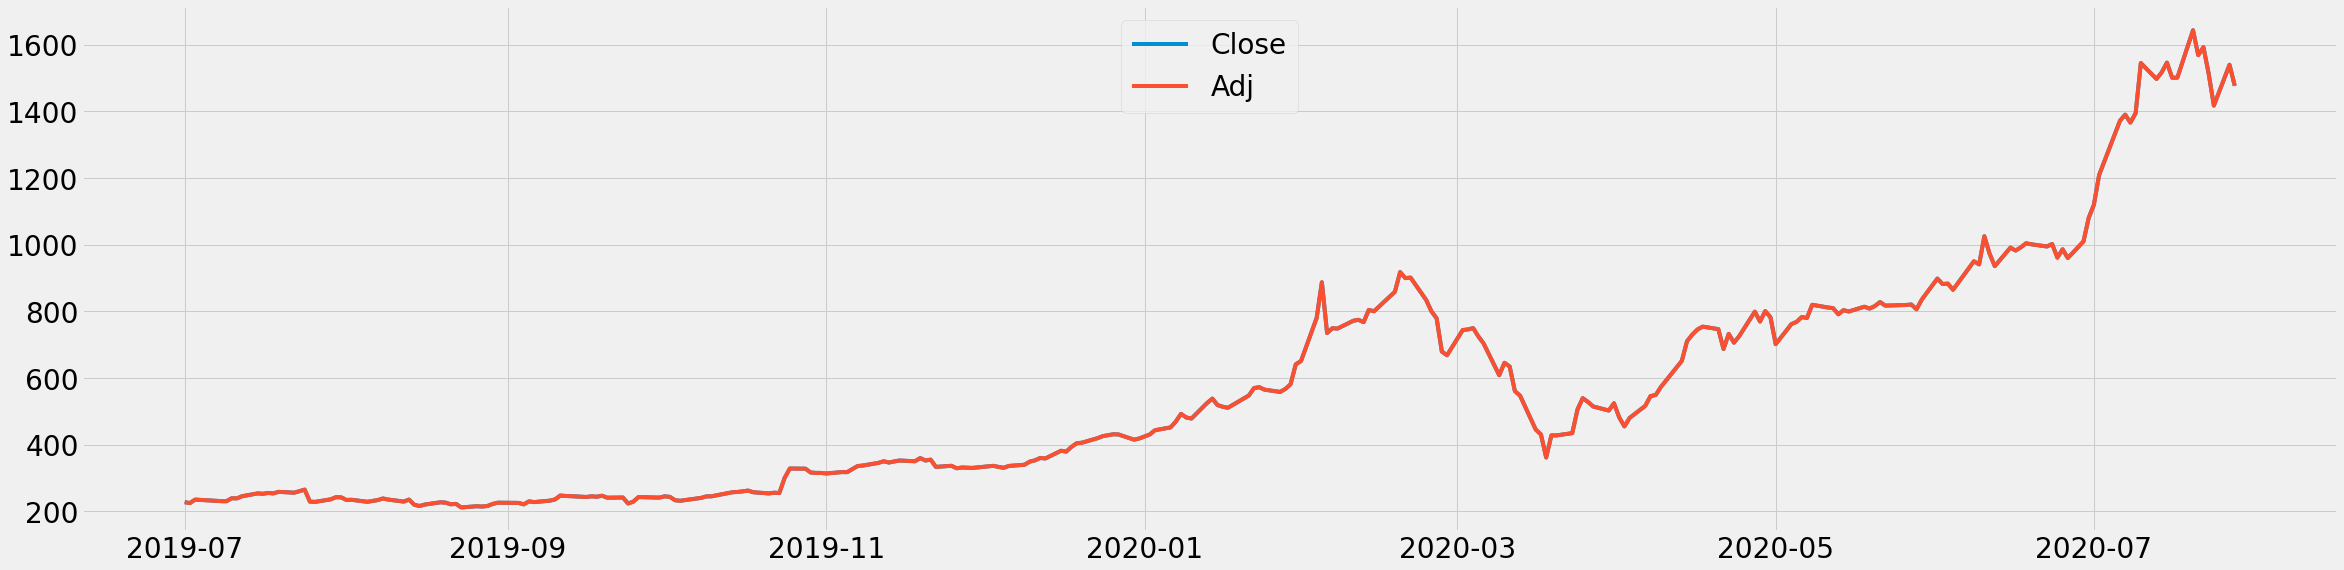

In [ ]:
# data prep
df = pdr.DataReader(stox, data_source='yahoo',start=sdate)
df.rename(columns={'Close':'close', 'Adj Close':'ac'}, inplace=True)
#df.shape
plt.figure(figsize=(fsx, fsy))
plt.plot(df['close'], label='Close')
plt.plot(df['ac'], label='Adj')
#ax.set_xticklabels(x_ticks, rotation=0, fontsize=fs)
#plt.xlabel('date', fontsize=fs); plt.ylabel('€')
plt.legend(loc='upper center', fontsize=fs); plt.show()
#df.tail(5)

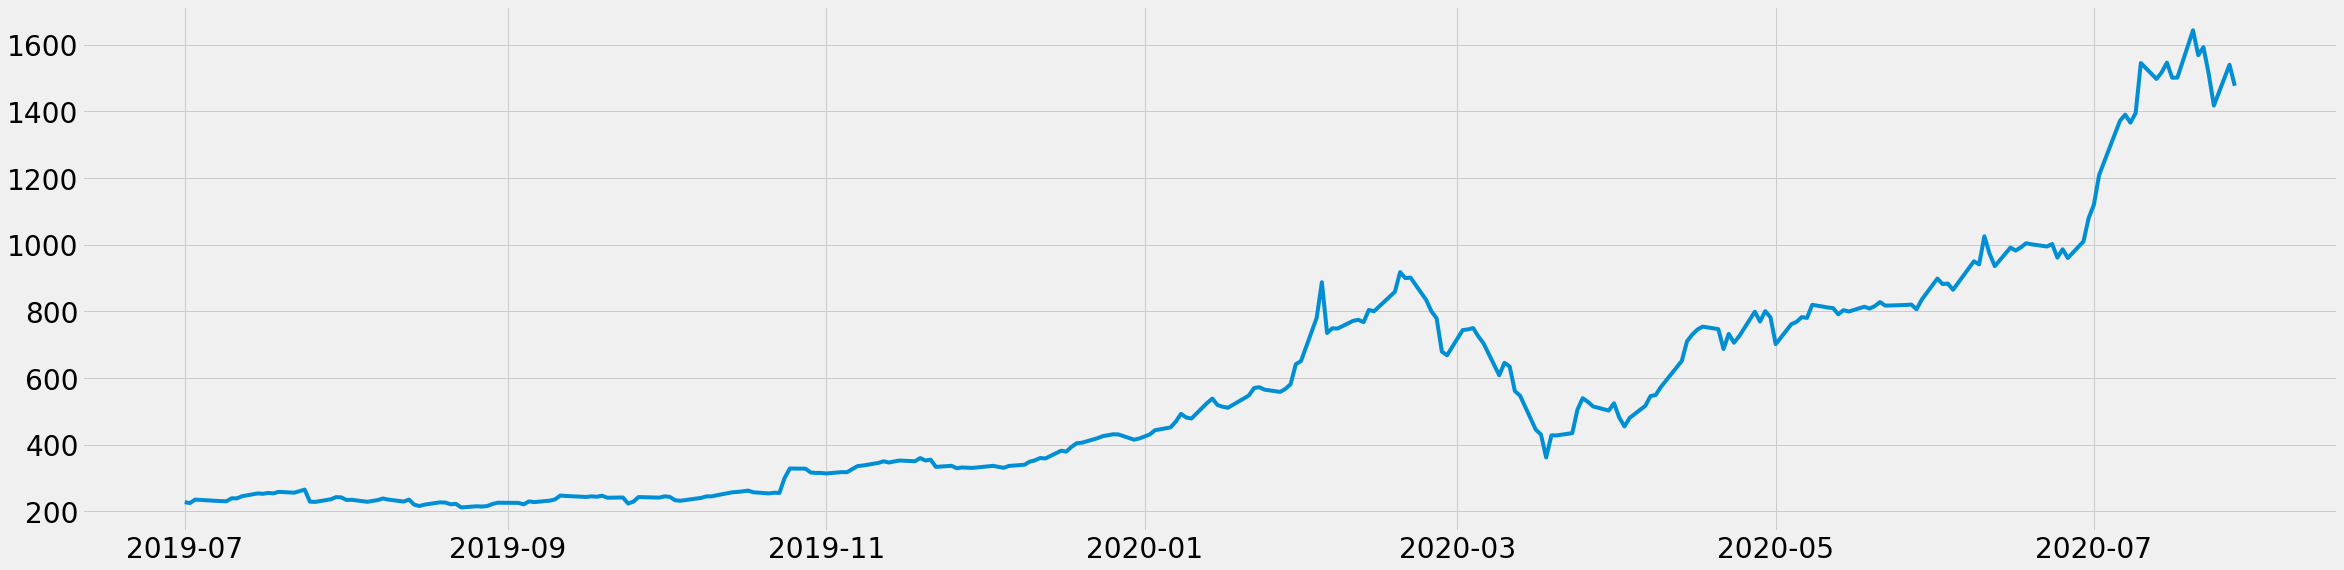

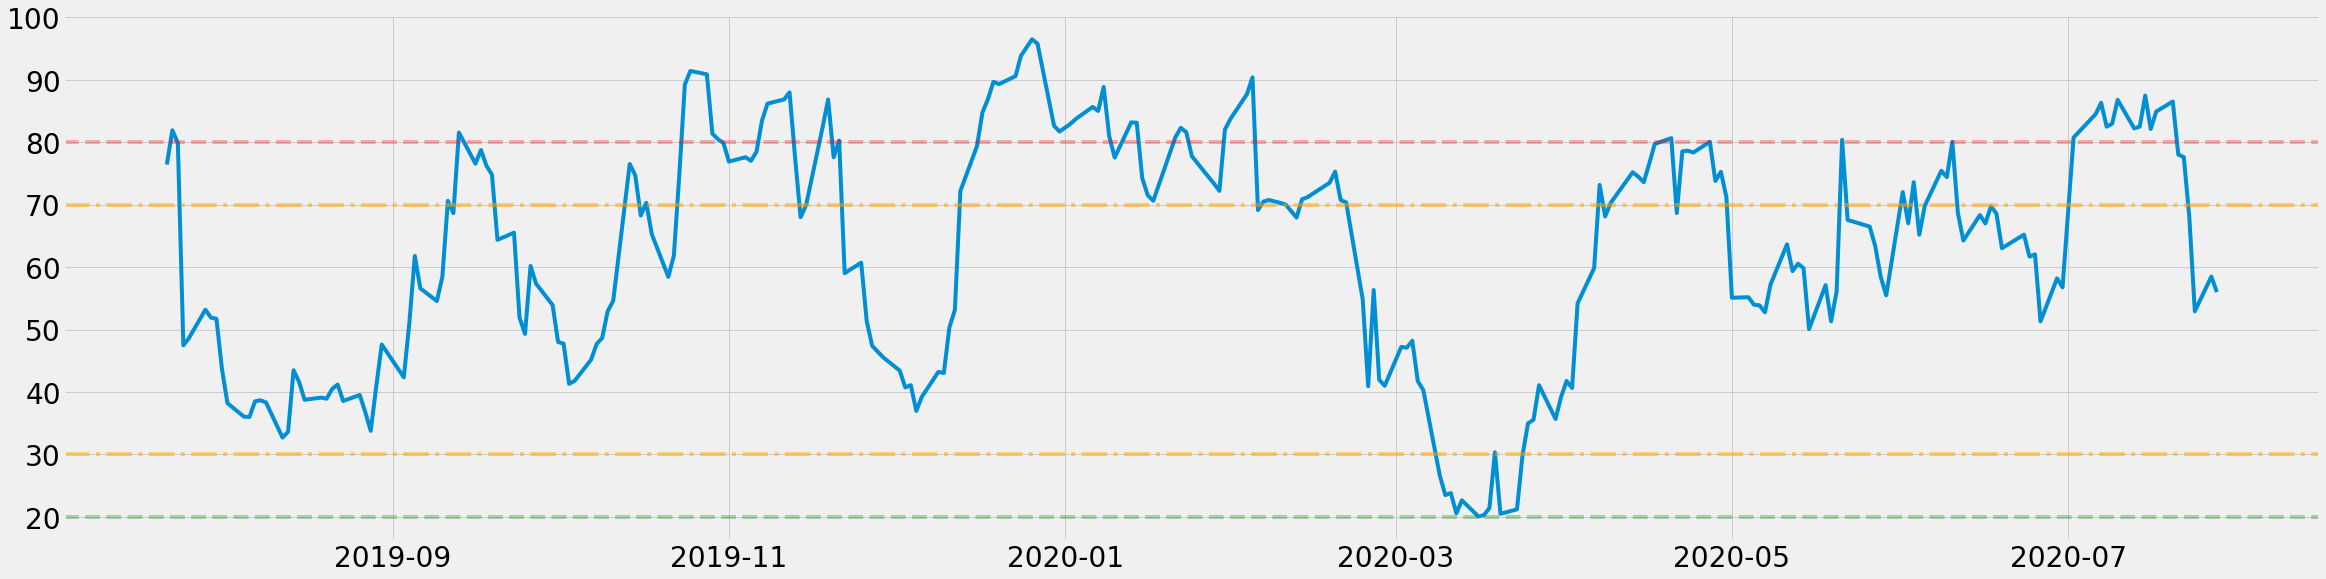

In [12]:
# RSI calc
pd1 = df['ac'].diff(1).dropna()
#pd1
gain = pd1.copy(); loss = pd1.copy()
gain[gain<0] = 0; loss[loss>0] = 0
avgg = gain.rolling(window=days).mean()
avgl = abs(loss.rolling(window=days).mean())
rs = avgg/avgl; rsi = 100.00 - (100.00 / (1.00 + rs))
#plt.figure(figsize=(fsx, fsy))
#rsi.plot(); plt.show()
ndf = pd.DataFrame()
ndf['ac'] = df['ac']; ndf['rsi'] = rsi
ndf.dropna()
plt.figure(figsize=(fsx, fsy))
plt.plot(ndf.index, ndf['ac'])
#plt.scatter
"""
plt.scatter(ct.index, ct['Bprice'], color='green', label='B', marker='^', s=99)
plt.scatter(ct.index, ct['Sprice'], color='red', label='S', marker='v', s=300)
"""
plt.show()
plt.figure(figsize=(fsx, fsy))
plt.plot(ndf.index, ndf['rsi'])
plt.axhline(80, linestyle='dashed', alpha=0.3, color='red')
plt.axhline(70, linestyle='dashdot', alpha=0.5, color='orange')
plt.axhline(30, linestyle='dashdot', alpha=0.5, color='orange')
plt.axhline(20, linestyle='dashed', alpha=0.3, color='green')
plt.show()

In [ ]:
ndf[-10:]

,ac,rsi
Date,,
2020-07-15,1546.010010,87.472790
2020-07-16,1500.640015,82.125297
2020-07-17,1500.839966,84.910583
2020-07-20,1643.000000,86.520356
2020-07-21,1568.359985,78.022508
2020-07-22,1592.329956,77.615499
2020-07-23,1513.069946,67.989219
2020-07-24,1417.000000,52.914381
2020-07-27,1539.599976,58.473676
